In [404]:
import pandas as pd
import numpy as np
from scipy import sparse
import cpp.python_modules.ML as ML
import matplotlib as plt
import pylab as pl
from matplotlib.colors import ListedColormap

In [321]:
train_data_x = pd.read_csv('train_data_x.csv')
test_data_x = pd.read_csv('test_data_x.csv')
test_data_y = pd.read_csv('test_data_y.csv')

In [347]:
len(test_data_x.head().visits[0].split())

29

In [323]:
# list(map(int,)
test_data_x.visits[5]

'17 39 145 147 176 187 260 264 288 298 335 339 481 540 561 571 614 668 676 759 797 806 836 884 887 956 962 1052 1076 1084'

In [324]:
amount_of_days = 1099
amount_of_weeks = (amount_of_days+1)//7
days_in_week = 7
days_in_last_week = [day for day in np.arange(amount_of_days-6,amount_of_days+1)]




In [325]:
def get_client_visits(client_id):
    return list(map(int,test_data_x.visits[client_id-1].split()))

In [326]:
def create_sparse_matrix_from_data(data,shape):
    row_indices = []
    column_indices = []
    
    for number, element in enumerate(data):
        row_indices.append((element-1)// days_in_week)
        column_indices.append((element-1)%days_in_week)
    elements = np.full(len(column_indices),True)
    return sparse.csr_matrix((elements,(row_indices,column_indices)),shape=shape,dtype=int)

def create_client_visits_matrix(client_id):
    visits = get_client_visits(client_id)
    return create_sparse_matrix_from_data(visits,(amount_of_weeks,days_in_week))


In [260]:
def create_classic_weights(size,delta=1):
    weights = [((size-i+1)/size)**delta for i in range(size)]
    weights_sum = sum(weights)
    return np.array([weight/weights_sum for weight in weights])

In [385]:
def get_weekly_probabilities(client_id):
   client_matrix = create_client_visits_matrix(client_id)
   weights = create_classic_weights(client_matrix.get_shape()[0],1)
   return weights.transpose() * client_matrix

def get_first_weekly_probabilities(client_id):
    weekly_probabilities = get_weekly_probabilities(client_id)
    first_weekly_probabilities = []
    for j,p in enumerate(weekly_probabilities):
        weekly_probabilities_neg = np.array([1-pj for pj in weekly_probabilities[0:j]])
        first_weekly_probabilities.append(p*weekly_probabilities_neg.prod())
    return np.array(first_weekly_probabilities)

def get_first_day(client_id):
    return np.argmax(get_first_weekly_probabilities(client_id))+1

In [277]:
def check_accuracy():
    accuracy = 0
    for id in test_data_x.id:
        first_day = get_first_day(id)
        if(first_day == list(test_data_y[test_data_y.id == id].nextvisit).pop()):
            accuracy += 1
    return accuracy/len(test_data_y.id)

In [278]:
check_accuracy()

0.11715666666666667

In [364]:
len(test_data_y.index)

300000

In [365]:
300000-133876

166124

In [411]:
def showData (x,y,nClasses):
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#000000','#FF00FF', '#0000FF', '#00FFF0','#FFFFA0'])
    pl.scatter(x,y,
               c=y,
               cmap=classColormap)
    pl.show()   


In [428]:
def get_sum_probability():
    x = []
    y = []
    for id,visit in zip(test_data_x.id[0:5000],test_data_y.nextvisit[0:5000]):
        x.append(get_first_weekly_probabilities(id)[6])
        y.append(visit)
    return (x,y)

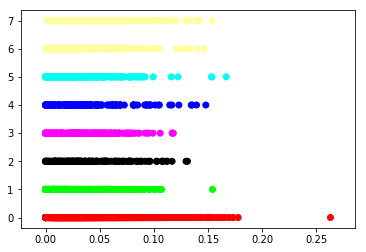

In [429]:
x,y = get_sum_probability()
showData(x,y,7)

In [379]:
get_first_day(1)

2